In [1]:
##NN with Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as ListedColormap
import seaborn as sns
from scipy import stats

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report

In [2]:
df= pd.read_csv("heart.csv").drop('Unnamed: 0', axis=1).dropna()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        297 non-null    int64  
 1   Sex        297 non-null    int64  
 2   ChestPain  297 non-null    object 
 3   RestBP     297 non-null    int64  
 4   Chol       297 non-null    int64  
 5   Fbs        297 non-null    int64  
 6   RestECG    297 non-null    int64  
 7   MaxHR      297 non-null    int64  
 8   ExAng      297 non-null    int64  
 9   Oldpeak    297 non-null    float64
 10  Slope      297 non-null    int64  
 11  Ca         297 non-null    float64
 12  Thal       297 non-null    object 
 13  AHD        297 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 34.8+ KB


In [4]:
df.columns

Index(['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR',
       'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

In [5]:
df.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768
std,9.049736,0.468500,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [6]:
df.head(5)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [7]:
# Create a set of dummy variables for the categorical variables
df_ChestPain = pd.get_dummies(df['ChestPain'])
df_Thal = pd.get_dummies(df['Thal'])

In [8]:
df_ChestPain.head(5)

,asymptomatic,nonanginal,nontypical,typical
0,0,0,0,1
1,1,0,0,0
2,1,0,0,0
3,0,1,0,0
4,0,0,1,0


In [9]:
## Dropping categorial variables
X_old = df.drop(['AHD','ChestPain','Thal'],axis=1)

In [11]:
## Defining inputs and ouput
X = pd.concat([X_old, df_Thal,df_ChestPain], axis=1)
y = pd.factorize(df.AHD)[0]

In [12]:
X.head(5)

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,fixed,normal,reversable,asymptomatic,nonanginal,nontypical,typical
0,63,1,145,233,1,2,150,0,2.3,3,0.0,1,0,0,0,0,0,1
1,67,1,160,286,0,2,108,1,1.5,2,3.0,0,1,0,1,0,0,0
2,67,1,120,229,0,2,129,1,2.6,2,2.0,0,0,1,1,0,0,0
3,37,1,130,250,0,0,187,0,3.5,3,0.0,0,1,0,0,1,0,0
4,41,0,130,204,0,2,172,0,1.4,1,0.0,0,1,0,0,0,1,0


In [13]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [17]:
#Create Neural Network
nn = MLPClassifier(hidden_layer_sizes=(2,1), activation='logistic',solver='sgd',learning_rate_init=0.2)

In [18]:
#Training Neural Network
nn.fit(X_std,y)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(2, 1),
              learning_rate_init=0.2, solver='sgd')

In [21]:
##Accuracy
nn.score(X_std,y)

0.9158249158249159

In [22]:
#Predicting
pred=nn.predict(X_std)

In [23]:
## Confusion matrix
cm1 = pd.DataFrame(confusion_matrix(y, pred).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm1.index.name = 'Predicted'
cm1.columns.name = 'True'
cm1

True,No,Yes
Predicted,,
No,146,11
Yes,14,126


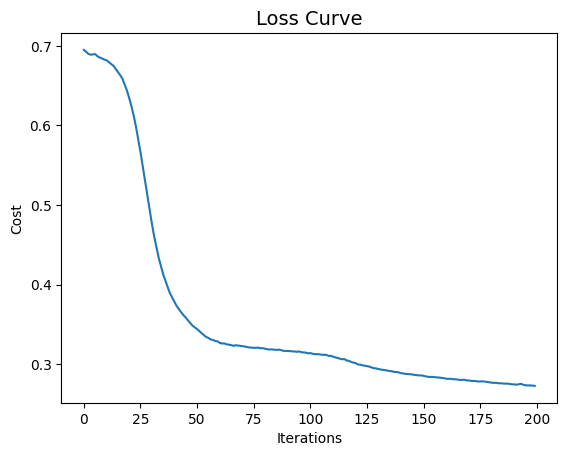

In [27]:
plt.plot(nn.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [28]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'logistic'],
    'learning_rate': ['constant','adaptive'],
}

In [29]:
grid = GridSearchCV(nn, param_grid, cv=5)

grid.fit(X_std, y)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (

GridSearchCV(cv=5,
             estimator=MLPClassifier(activation='logistic',
                                     hidden_layer_sizes=(2, 1),
                                     learning_rate_init=0.2, solver='sgd'),
             param_grid={'activation': ['tanh', 'logistic'],
                         'hidden_layer_sizes': [(150, 100, 50), (120, 80, 40),
                                                (100, 50, 30)],
                         'learning_rate': ['constant', 'adaptive'],
                         'max_iter': [50, 100, 150]})

In [30]:
print(grid.best_params_) 

{'activation': 'logistic', 'hidden_layer_sizes': (120, 80, 40), 'learning_rate': 'adaptive', 'max_iter': 50}
